# Preproccessing and feature engineering

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures

In [76]:
train = pd.read_csv('../datasets/train_cleaned_data.csv')
test = pd.read_csv('../datasets/test_cleaned_data.csv')

In [52]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


In [53]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,None,None,None,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,None,IR1,Lvl,...,0,0,0,None,None,None,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,None,IR1,Lvl,...,0,0,0,None,None,None,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,None,Reg,Lvl,...,0,0,0,None,None,None,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,None,IR1,Lvl,...,0,185,0,None,None,None,0,7,2009,WD


In [54]:
train.shape

(2018, 81)

In [55]:
test.shape

(878, 80)

## EDA

#### The numeric features are a lot, so display the correlations more than 0.5

In [56]:
numeric_features = [col for col in train._get_numeric_data().columns]
train[numeric_features].corr()['SalePrice'].sort_values()

PID               -0.248814
Enclosed Porch    -0.138308
Kitchen AbvGr     -0.128134
Overall Cond      -0.093615
MS SubClass       -0.084054
Id                -0.051510
Bsmt Half Bath    -0.041285
Low Qual Fin SF   -0.040970
Yr Sold           -0.013951
Misc Val          -0.008205
BsmtFin SF 2       0.003695
Pool Area          0.028810
Mo Sold            0.033469
3Ssn Porch         0.054131
Screen Porch       0.109374
Bedroom AbvGr      0.133421
Bsmt Unf SF        0.187490
2nd Flr SF         0.243336
Half Bath          0.274951
Lot Area           0.280859
Bsmt Full Bath     0.290746
Wood Deck SF       0.324150
Open Porch SF      0.334204
Lot Frontage       0.343230
BsmtFin SF 1       0.448180
Fireplaces         0.475792
TotRms AbvGrd      0.495543
Mas Vnr Area       0.507411
Garage Yr Blt      0.526937
Full Bath          0.533344
Year Remod/Add     0.558529
Year Built         0.582663
1st Flr SF         0.644921
Garage Area        0.650747
Garage Cars        0.652621
Total Bsmt SF      0

In [57]:
corr_more05 = train[numeric_features].corr()['SalePrice'][train[numeric_features].corr()['SalePrice'] > 0.5].keys()

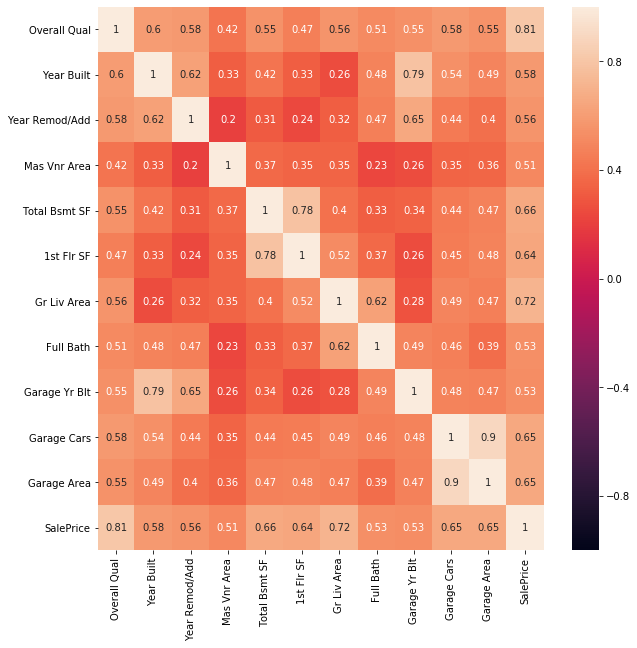

In [58]:
plt.figure(figsize=(10, 10));
sns.heatmap(train[corr_more05].corr(), annot=True, vmin=-1, vmax=1);

### To see each numeric feature distribution, create histograms

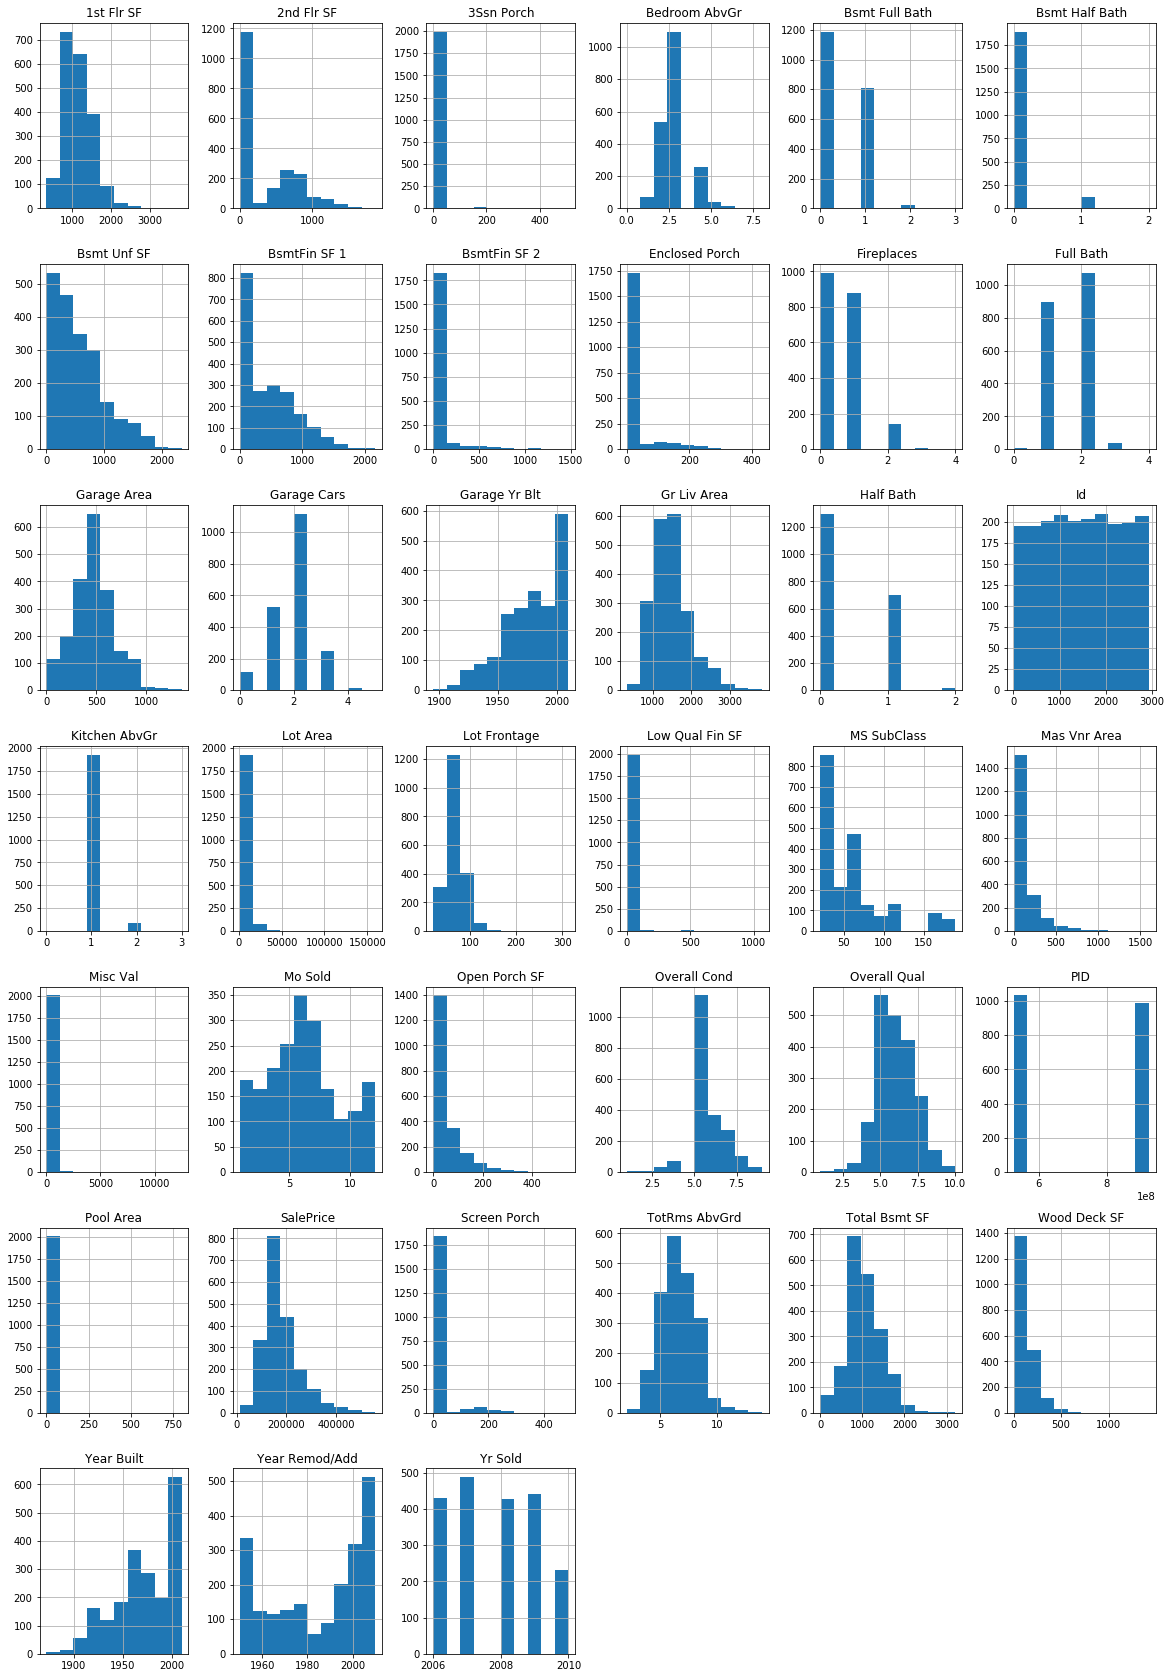

In [10]:
train.hist(figsize=(20, 30));

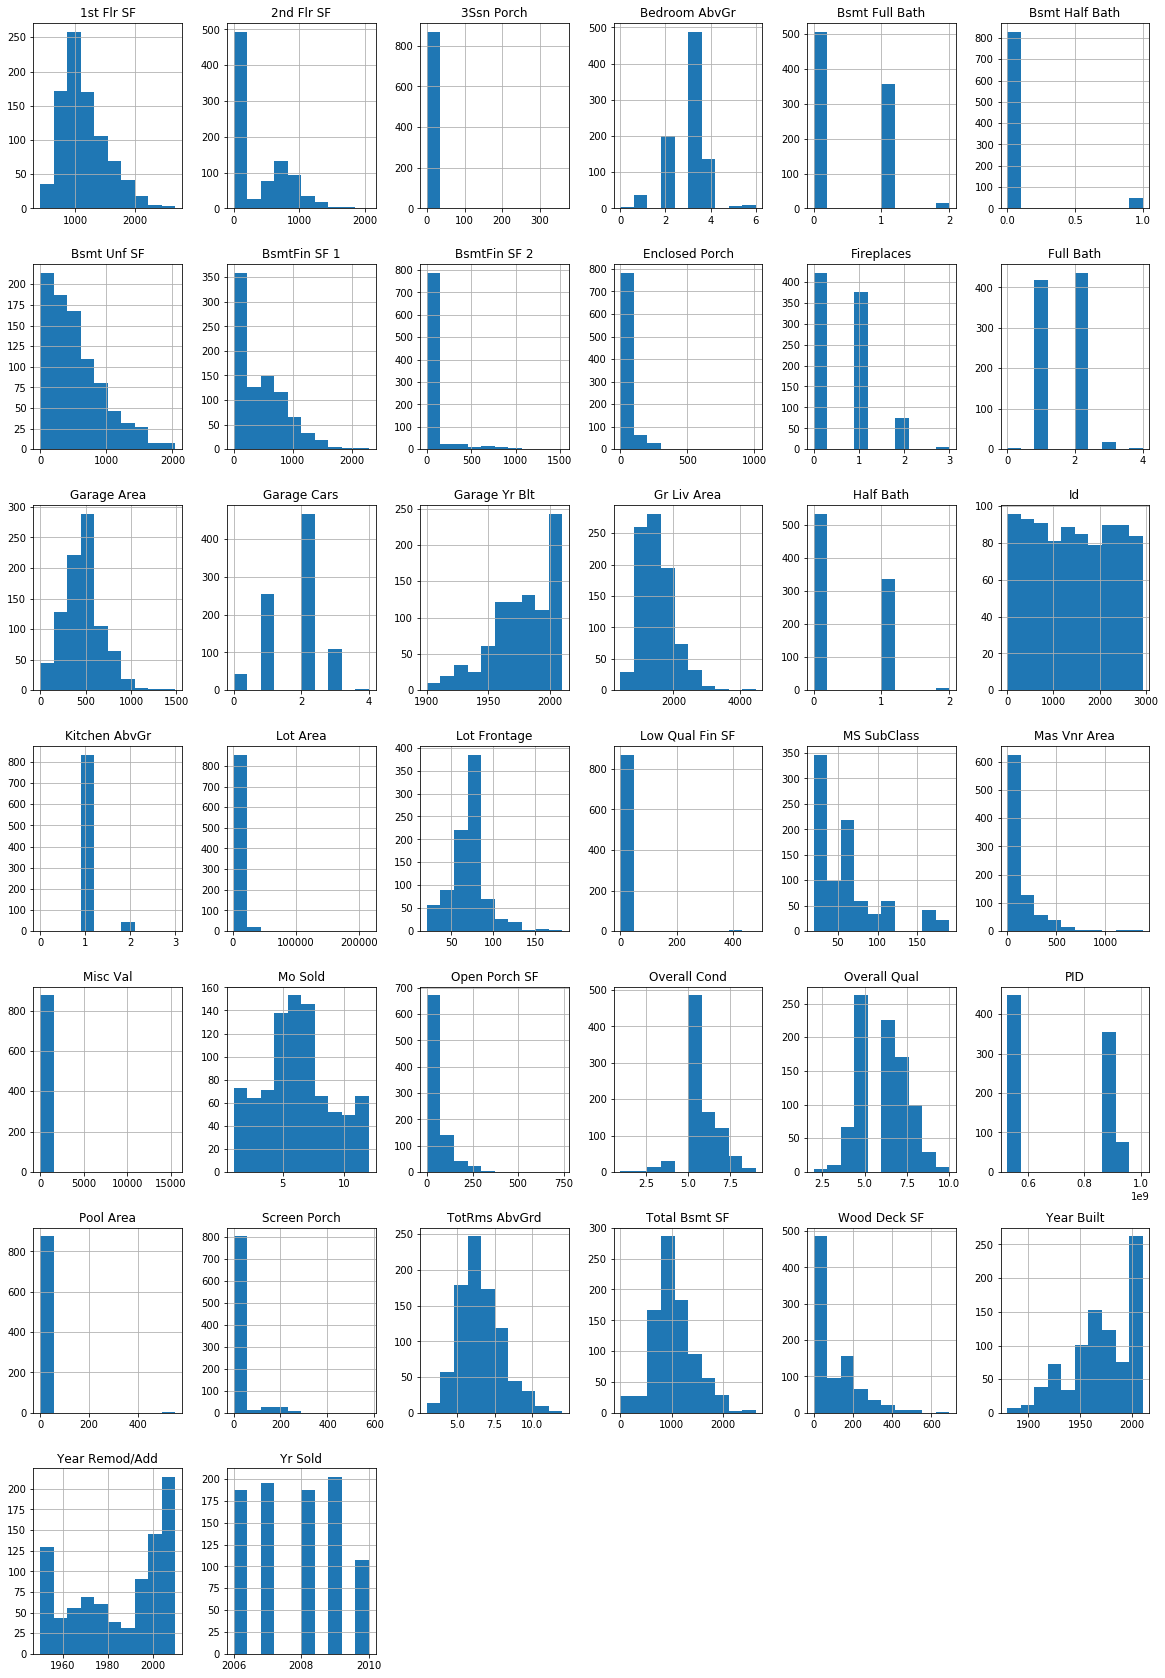

In [11]:
test.hist(figsize=(20, 30));

##### To see each categorical feature distribution, create violinplot

In [12]:
def plot_violinplot(dataframe, list_of_columns, y_column_name, figsize=(100,20)):
    nrows = int(np.ceil(len(list_of_columns)/4)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=4) # You'll want to specify your figsize
    fig.set_figheight(figsize[0]);
    fig.set_figwidth(figsize[1]);
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.violinplot(x=col, y=y_column_name, data=dataframe, ax=ax[i], kind='violin');

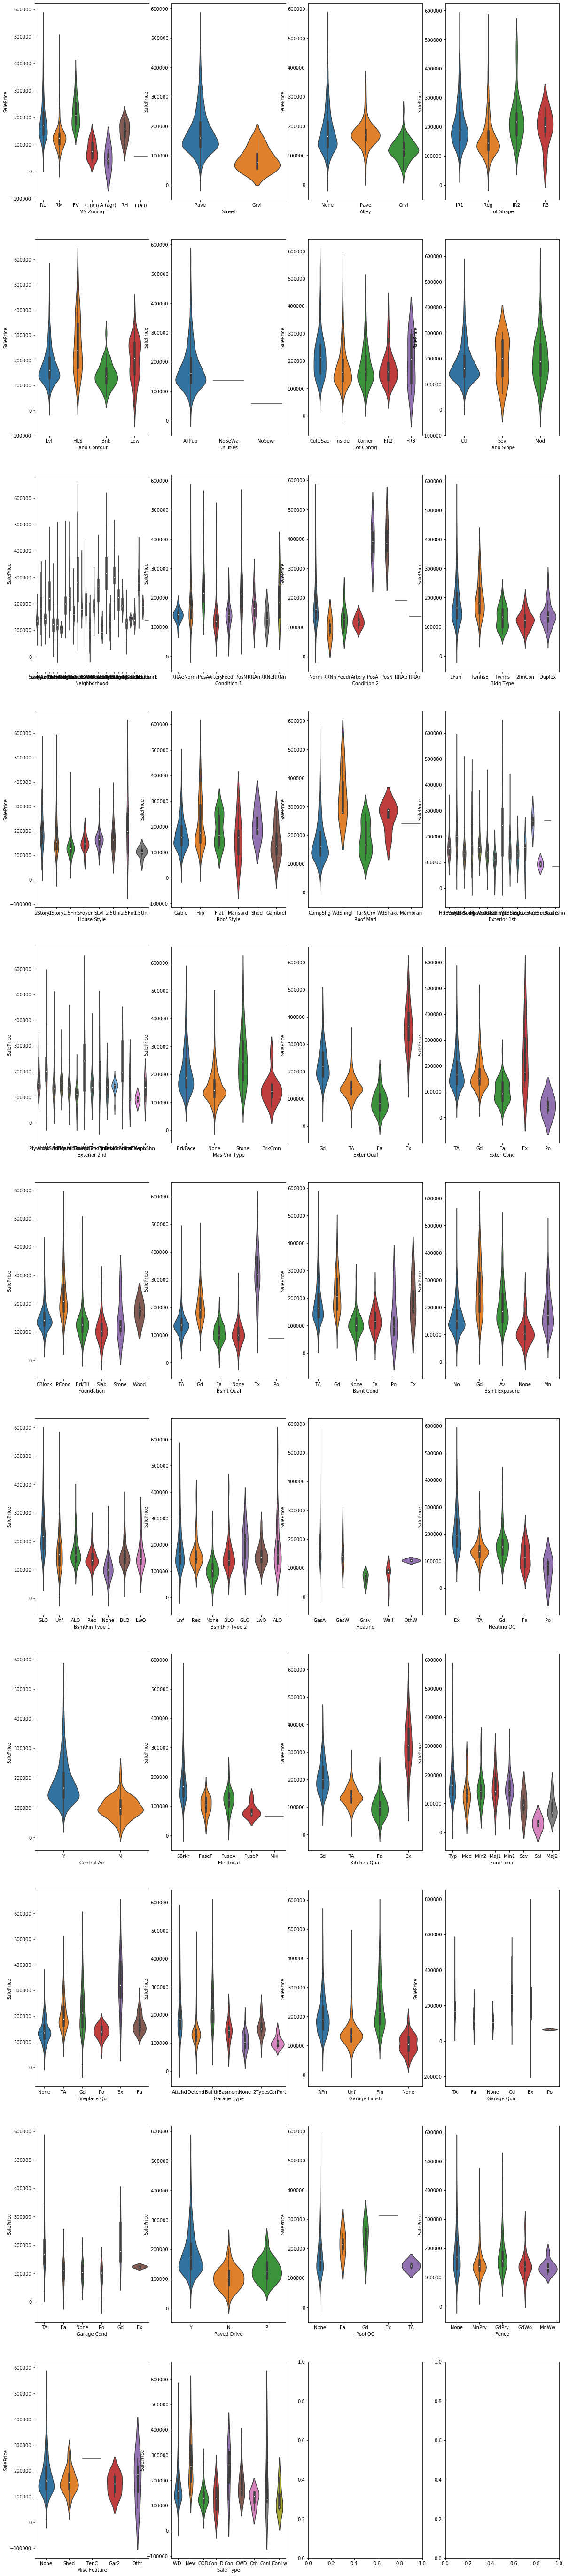

In [13]:
plot_violinplot(
    train, 
    train.select_dtypes(exclude=["number","bool_"]).columns, 
    'SalePrice'
)

##### From the EDA, some numeric distributions are skewed, and some categorical data has difference in their sub categories which might affect the SalePrice
##### Regarding some numeric data, conduct log transformation since they skewed to the right.
##### Regarding some categorical data, make dummy or label data.

# Feature engineering

## Dummy or label data
To try various engineered features for modeling, at first, create datasets just with labeled or dummied categorical data

In [59]:
train = pd.get_dummies(train, columns=['Street', 'Roof Matl', 'Central Air', 'MS Zoning'], drop_first=True)
test = pd.get_dummies(test, columns=['Street', 'Roof Matl', 'Central Air', 'MS Zoning'], drop_first=True)

In [60]:
train.shape

(2018, 89)

In [61]:
test.shape

(878, 88)

In [62]:
print(train['Exter Qual'].unique())
print(test['Exter Qual'].unique())

['Gd' 'TA' 'Fa' 'Ex']
['TA' 'Gd' 'Fa' 'Ex']


In [63]:
print(train['Kitchen Qual'].unique())
print(test['Kitchen Qual'].unique())

['Gd' 'TA' 'Fa' 'Ex']
['Fa' 'TA' 'Gd' 'Ex' 'Po']


In [64]:
print(train['Heating QC'].unique())
print(test['Heating QC'].unique())

['Ex' 'TA' 'Gd' 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa']


In [65]:
exter_qual = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1}
kitchen_qual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
heating_qc = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

In [66]:
train['Exter Qual'] = train['Exter Qual'].apply(lambda x: exter_qual[x])
test['Exter Qual'] = test['Exter Qual'].apply(lambda x: exter_qual[x])

train['Kitchen Qual'] = train['Kitchen Qual'].apply(lambda x: kitchen_qual[x])
test['Kitchen Qual'] = test['Kitchen Qual'].apply(lambda x: kitchen_qual[x])

train['Heating QC'] = train['Heating QC'].apply(lambda x: heating_qc[x])
test['Heating QC'] = test['Heating QC'].apply(lambda x: heating_qc[x])

In [67]:
train['con2_posa_posn'] = train['Condition 2'].apply(lambda x: 1 if (x == 'PosA') or (x == 'PosN') else 0)
test['con2_posa_posn'] = test['Condition 2'].apply(lambda x: 1 if (x == 'PosA') or (x == 'PosN') else 0)

### Save the data

In [23]:
train.to_csv('../datasets/train_incl_dummy.csv', index=False)
test.to_csv('../datasets/test_incl_dummy.csv', index=False)

## Log transformation

In [91]:
train_numeric_features = [col for col in train._get_numeric_data().columns]
test_numeric_features = [col for col in test._get_numeric_data().columns]

In [92]:
# Some data has 0, so uses yeo-johnson
def log_transformation(dataframe, numeric_features):
    transformed_feature = []
    for col in numeric_features:
        pt = PowerTransformer(method='yeo-johnson')

        skewness = stats.skew(dataframe[col])

        # the threshold is 0.5
        if skewness > 0.5:
            pt.fit(dataframe[col].to_numpy().reshape(-1, 1))
            dataframe[col] = pt.transform(dataframe[col].to_numpy().reshape(-1, 1))
            
            transformed_feature.append(col)
    
    return print(transformed_feature)

In [94]:
log_transformation(train, train_numeric_features)
log_transformation(test, test_numeric_features)

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']


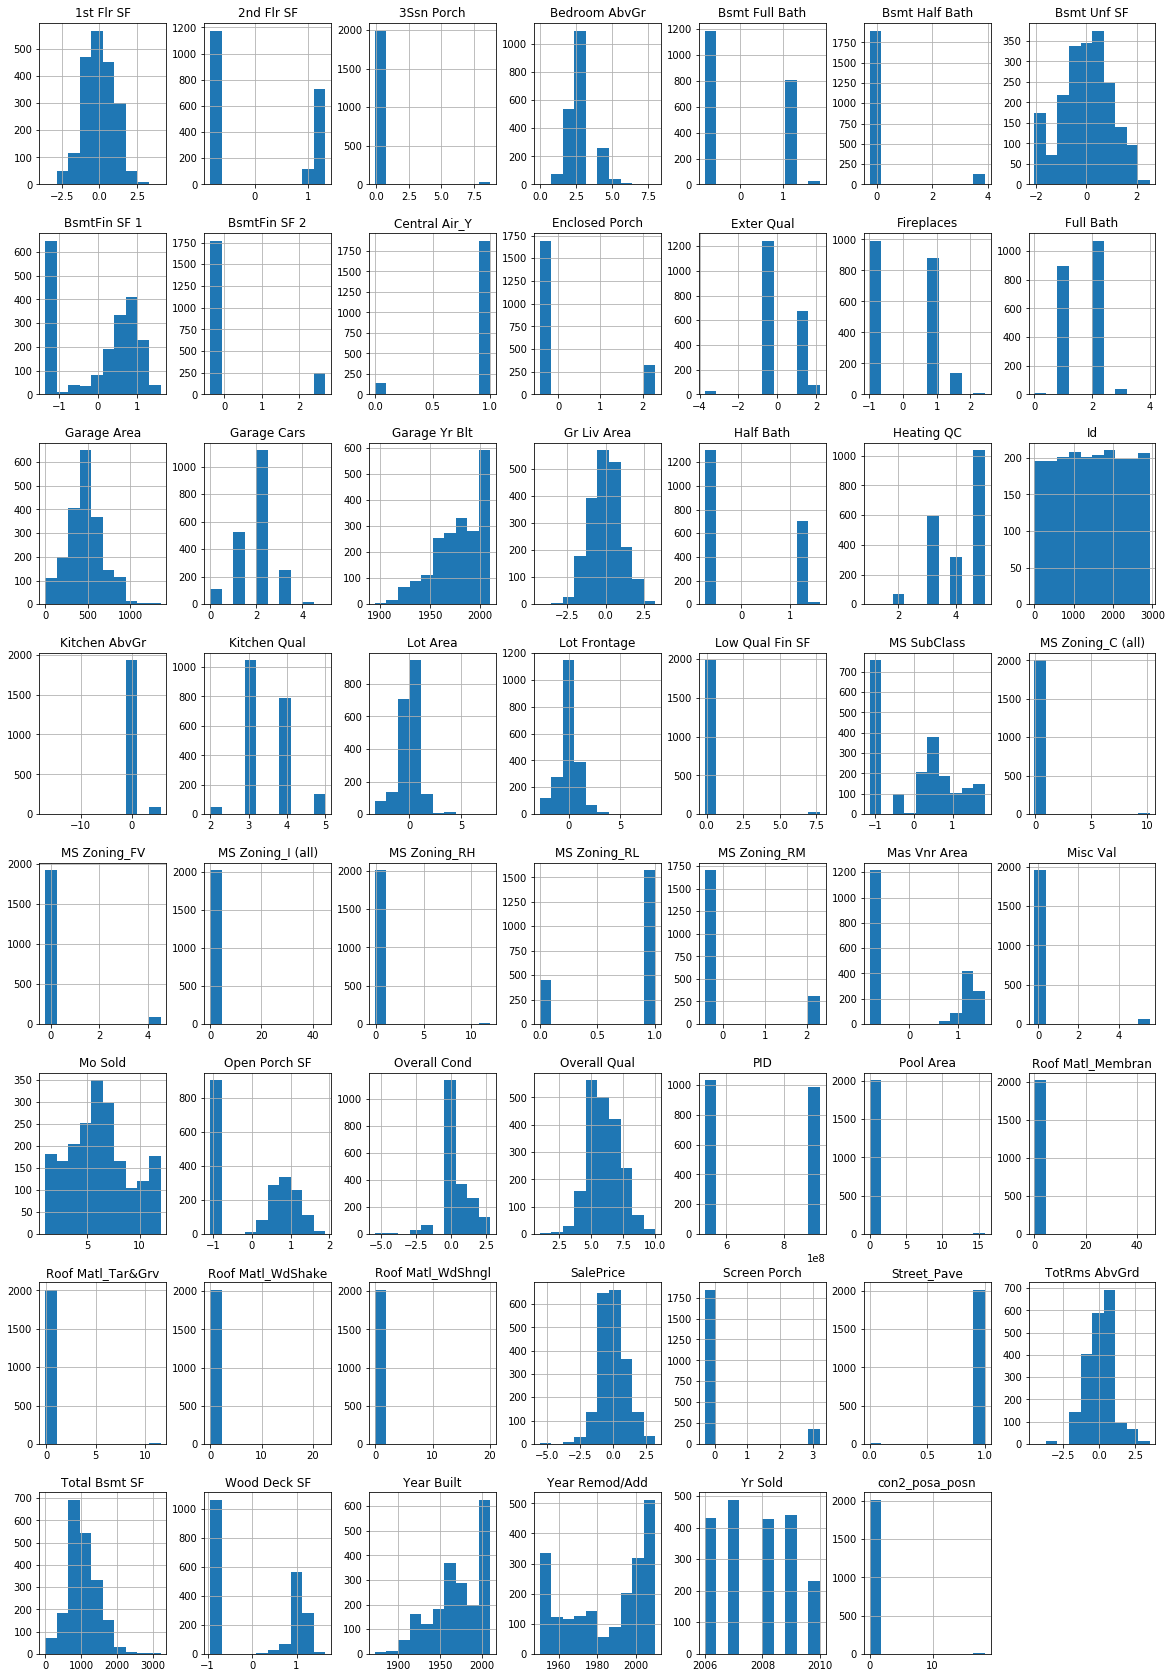

In [27]:
train.hist(figsize=(20, 30));

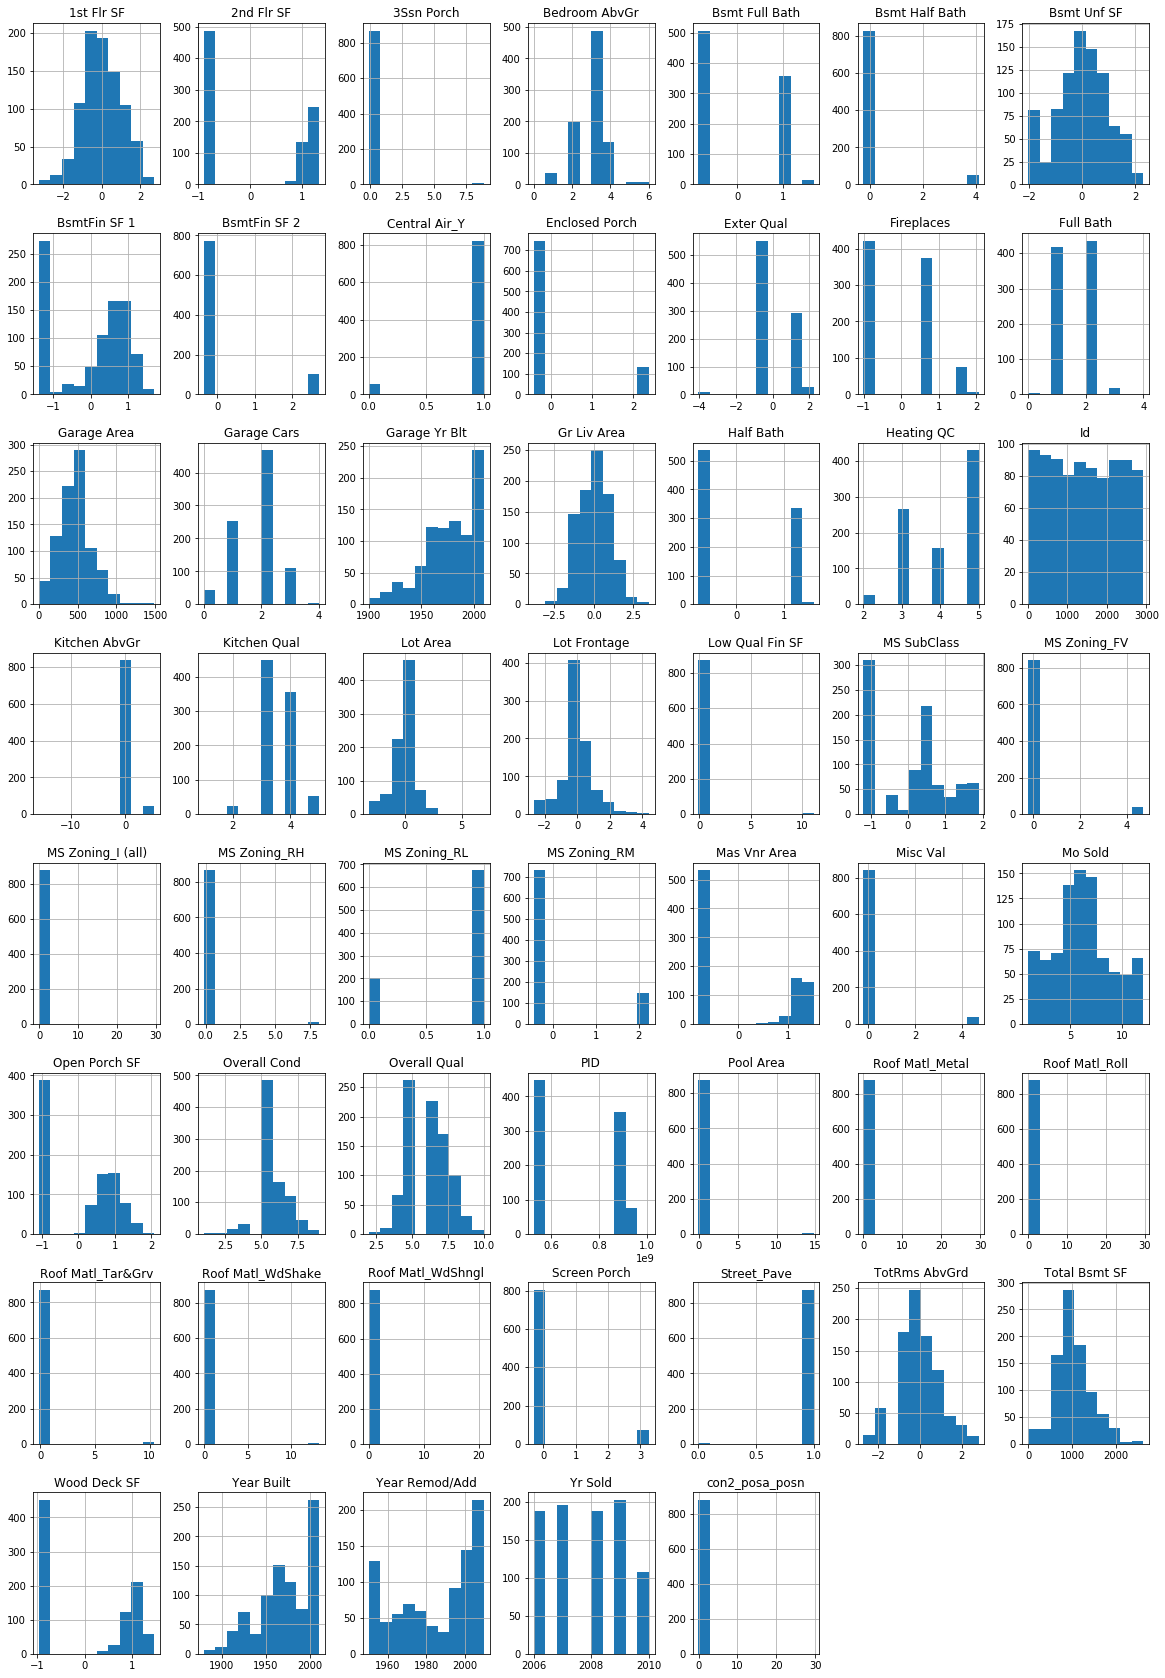

In [28]:
test.hist(figsize=(20, 30));

In [29]:
train[train_numeric_features].corr()['SalePrice'].sort_values()

MS Zoning_RM        -0.328024
PID                 -0.261840
Enclosed Porch      -0.229855
MS Zoning_C (all)   -0.193663
Kitchen AbvGr       -0.109630
Low Qual Fin SF     -0.077365
MS Zoning_I (all)   -0.055349
Id                  -0.047677
Misc Val            -0.040571
MS Zoning_RH        -0.029034
Bsmt Half Bath      -0.026324
BsmtFin SF 2        -0.026060
MS SubClass         -0.021825
Yr Sold             -0.017383
Overall Cond        -0.014920
Roof Matl_Tar&Grv    0.017213
Roof Matl_Membran    0.020764
Mo Sold              0.029521
Pool Area            0.035306
Roof Matl_WdShake    0.050377
3Ssn Porch           0.055942
Roof Matl_WdShngl    0.088006
Screen Porch         0.098727
Street_Pave          0.101497
2nd Flr SF           0.106794
con2_posa_posn       0.120102
MS Zoning_FV         0.135092
Bedroom AbvGr        0.169712
Bsmt Unf SF          0.186695
MS Zoning_RL         0.281147
Bsmt Full Bath       0.291085
Half Bath            0.303164
BsmtFin SF 1         0.303899
Lot Fronta

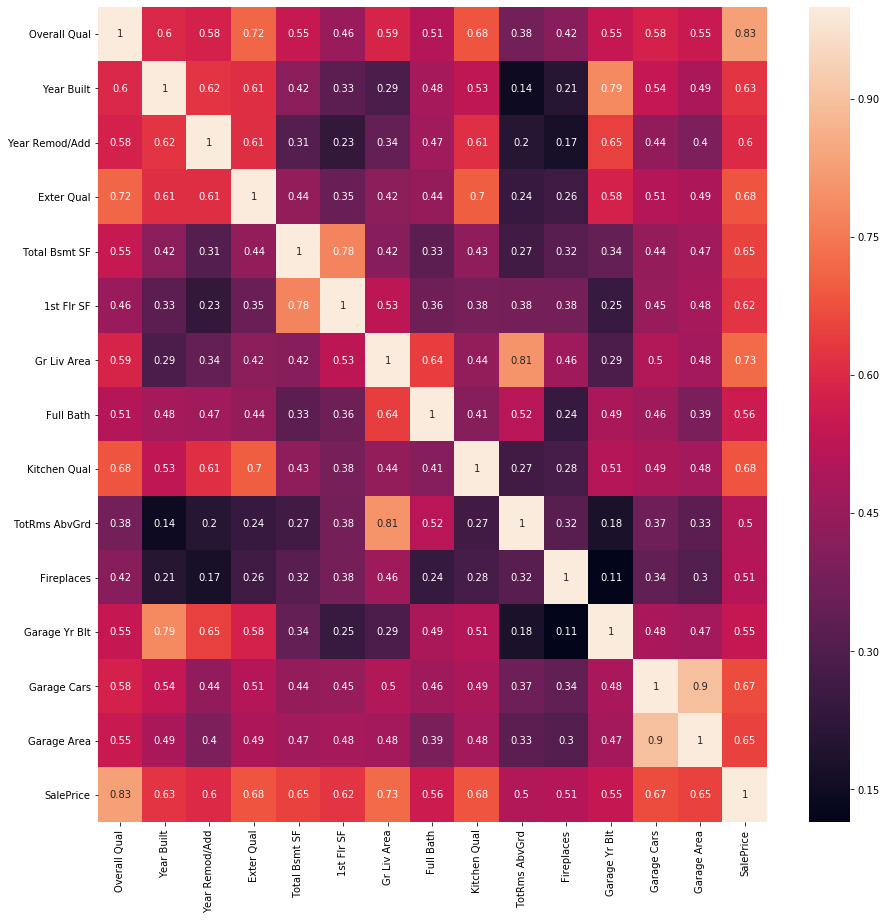

In [30]:
corr_more05 = train[train_numeric_features].corr()['SalePrice'][train[train_numeric_features].corr()['SalePrice'] > 0.5].keys()
plt.figure(figsize=(15, 15));
sns.heatmap(train[corr_more05].corr(), annot=True);


### Save the data

In [31]:
train.to_csv('../datasets/train_log_transform.csv', index=False)
test.to_csv('../datasets/test_log_transform.csv', index=False)

## Polynomial features
Make new features with the PolynomialFeatures

In [32]:
train = pd.read_csv('../datasets/train_incl_dummy.csv')
test = pd.read_csv('../datasets/test_incl_dummy.csv')

In [33]:
# Get the numeric feature names
train_numeric_features = [col for col in train._get_numeric_data().columns]
train_numeric_features.remove('SalePrice')

In [34]:
# Get the polynomial features for the train data
poly = PolynomialFeatures(include_bias=False)
feature_poly = poly.fit_transform(train[train_numeric_features])
train_poly = pd.DataFrame(feature_poly, columns=poly.get_feature_names(train_numeric_features))
train_poly['SalePrice'] = train['SalePrice']

In [35]:
# Get the polynomial features for the train data
test_numeric_features = [col for col in test._get_numeric_data().columns]

poly = PolynomialFeatures(include_bias=False)
feature_poly = poly.fit_transform(test[test_numeric_features])
test_poly = pd.DataFrame(feature_poly, columns=poly.get_feature_names(test_numeric_features))

### Picks features for the model

In [36]:
# Save the highly correlated (more than 0.8) column names if a feature is highly correlated to other features
def get_corr_more08(dataframe):
    corr_dict = {}
    for index, item in dataframe.corr().iterrows():
        corr_dict[index] = []
        for col in dataframe.columns:
            if item[col] >= 0.8:
                corr_dict[index].append(col)
    
    return corr_dict

In [37]:
# At first, pick up column names correlated to the SalePrice more than 0.5
poly_corr_more_05 = [key for key, val in train_poly.corr()['SalePrice'].sort_values(ascending=False).items() if val >= 0.5]
poly_corr_more_05.remove('SalePrice') # This column is the target

# get highly correlated feature names on each feature
corr_more08 = get_corr_more08(train_poly)

# pick features from the highest correlation to the salePrice orderly.
# And exclude features higly correlated to othre features.
final_features = []
for col_name in poly_corr_more_05:
    if( col_name not in final_features) & (len(set(corr_more08[col_name]) & set(final_features)) == 0):
        final_features.append(col_name)

In [38]:
final_features.append('SalePrice')

In [39]:
train_poly[final_features].corr()['SalePrice']

Overall Qual Gr Liv Area       0.875048
Overall Qual Kitchen Qual      0.843268
Overall Qual 1st Flr SF        0.842596
Overall Qual Garage Area       0.825349
Total Bsmt SF TotRms AbvGrd    0.734334
Exter Qual Full Bath           0.726585
Lot Frontage Overall Qual      0.724750
Overall Qual Central Air_Y     0.706745
Exter Qual Heating QC          0.698845
Total Bsmt SF Central Air_Y    0.668645
Fireplaces Garage Area         0.645649
Heating QC TotRms AbvGrd       0.643845
Year Built Year Remod/Add      0.634124
Overall Qual Kitchen AbvGr     0.627990
BsmtFin SF 1 Gr Liv Area       0.611844
Mas Vnr Area Garage Cars       0.610505
Lot Frontage Full Bath         0.593868
Full Bath TotRms AbvGrd        0.589929
Overall Qual Bedroom AbvGr     0.584671
Overall Cond Garage Cars       0.578815
Full Bath Central Air_Y        0.575269
Overall Qual Overall Cond      0.571173
Bedroom AbvGr Garage Area      0.570795
Overall Cond Gr Liv Area       0.569090
Gr Liv Area MS Zoning_RL       0.564360


In [40]:
# Save the feature column names
final_features.remove('SalePrice')
np.save('../datasets/polynomial_features_for_modeling.npy', final_features)

### Save the data

In [41]:
train_poly.to_csv('../datasets/train_polynomial.csv', index=False)
test_poly.to_csv('../datasets/test_polynomial.csv', index=False)

# Data dictionary for modeling

- This data dictionary represents the training datasets features for creating models. The testing data has the same features except for the SalePrice.
- The train_log_transformed is log-transformed on the SalePrice, the ExterQual, the GrLivArea, and the Fireplaces.
- Using features correlated with the SalePrice more than 0.5 and not correlated with other features more than 0.8
- Plus using labeled categorical features which looked like they would affect the SalePrice

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Overall Qual**|*integer*|train_incl_dummy, train_log_trainsformed|The evaluation for overall material and finish quality (units represent quality which range from a minimum of 1 to a maximum of 10) |
|**Gr Liv Area**|*integer*|train_incl_dummy, train_log_trainsformed|The living area square feet above ground | 
|**Garage Area**|*float*|train_incl_dummy, train_log_trainsformed|The size of garage in square feet|
|**Total Bsmt SF**|*float*|train_incl_dummy, train_log_trainsformed|Total square feet of basement area|
|**Built Year**|*integer*|train_incl_dummy, train_log_trainsformed|Original construction year|
|**Fireplaces**|*integer*|train_incl_dummy, train_log_trainsformed|The number of fireplaces| 
|**Exter Qual**|*integer*|train_incl_dummy, train_log_trainsformed|The exterior material quality (units represent quality which range from a minimum of 1 to a maximum of 4) |
|**Kitchen Qual**|*integer*|train_incl_dummy, train_log_trainsformed|Kitchen quality (units represent quality which range from a minimum of 1 to a maximum of 5)|

- The features for the regression using polynomial data are a lot, so just display 5 features highly correlated to the SalePrice.
- Features correlated to the saleprice at the levele of the coefficients more than 0.5 wil be used for the modeling. and features that highly correlated each other are excluded.
- The '1st Flr SF' and the 'TotRms AbvGrd' are not used for the analysis. They are just the refferences for the 5 features above.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Overall Qual Gr Liv Area**|*float*|train_polynomial|The interactive feature the 'Overall Qual' X the 'Gr Liv Area'|
|**Overall Qual Kitchen Qual**|*float*|train_polynomial|The interactive feature the 'Overall Qual' X the 'Kitchen Qual'| 
|**Overall Qual 1st Flr SF**|*float*|train_polynomial|The interactive feature the 'Overall Qual' X the '1st Flr SF'|
|**Overall Qual Garage Area**|*float*|train_polynomial|The interactive feature the 'Overall Qual' X the 'Garage Area'|
|**Total Bsmt SF TotRms AbvGrd**|*float*|train_polynomial|The interactive feature the 'Total Bsmt SF' X the 'TotRms AbvGrd'|
|**1st Flr SF**|*float*|train_polynomial|First Floor square feet| 
|**TotRms AbvGrd**|*float*|train_polynomial|Total rooms above grade (does not include bathrooms)|